In [1]:
import pandas as pd
import seaborn as sns

def print_sort_chart(data, max_elements=50000):
    unique_num_elements = data_raw['NumElements'].unique()
    avg_data_rows = []
    for u_elem in unique_num_elements:
        data = [u_elem]
        filtered_rows = data_raw[data_raw['NumElements'] == u_elem]
        data.append(filtered_rows['InsertionSortTime'].mean())
        data.append(filtered_rows['MergeSortTime'].mean())
        data.append(filtered_rows['HeapSortTime'].mean())
        data.append(filtered_rows['QuickSortInPlaceTime'].mean())
        data.append(filtered_rows['QuickSortModifiedTime'].mean())
        avg_data_rows.append(data)
    data_avg = pd.DataFrame(avg_data_rows, columns=['NumElements', 'Insertion Sort', 'Merge Sort', 'Heap Sort', 'Quick Sort In Place', 'Quick Sort Modified'])
    data_for_vis = []
    for col in data_avg:
        if col is not 'NumElements':
            for index, val in enumerate(data_avg[col]):
                data_for_vis.append([unique_num_elements[index], val, col])
    data_finalized = pd.DataFrame(data_for_vis, columns=['Number of Elements', 'Average Time (ms)', 'Sort'])
    data_for_vis = []
    for col in data_avg:
        if col is not 'NumElements':
            for index, val in enumerate(data_avg[col]):
                data_for_vis.append([unique_num_elements[index], val, col])
    data_finalized = pd.DataFrame(data_for_vis, columns=['Number of Elements', 'Average Time (ms)', 'Sort'])
    data_filtered = data_finalized[data_finalized['Number of Elements'] <= max_elements]
    sns.lineplot(data=data_filtered, x='Number of Elements', y='Average Time (ms)', hue='Sort')

In [6]:
data_raw = pd.read_csv('jacob_sorting_results.csv')

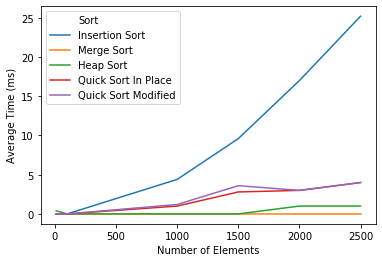

In [8]:
print_sort_chart(data_raw, 2500)